In [2]:
from MFEA_lib.model import AbstractModel, SMP_MFEA, MFEA_base, SMP_DE
from MFEA_lib.model.utils import *
from MFEA_lib.model.utils import TuningModel
import pandas as pd
import numpy as np
import scipy.io
from MFEA_lib.tasks.Benchmark.Funcs import * 
from MFEA_lib.operators.Crossover import *
from MFEA_lib.operators.Mutation import *
from MFEA_lib.operators.Selection import *
from MFEA_lib.operators.Search import *

### Draft

In [ ]:
pop = Population()

In [19]:
a = np.array([[1,2,2],[2,3,4]])
b = np.array([[3,4,5], [1,2,3]]) 
c = b > a 
print(c)

[[ True  True  True]
 [False False False]]


### Compare Benchmark

In [2]:
compare = CompareResultBenchmark(path_folder="./RESULTS/result/GECCO20", ls_benchmark=[WCCI22_benchmark.get_50tasks_benchmark(i)[0] for i in range(1, 11)])

(0 : LSA_2021)
(1 : SMP_V2)
(2 : LSA_21_NOLOCAL)
(3 : SBS_GA)
(4 : LSA)
(5 : SA)


In [3]:
compare.summarizing_compare_result(idx_main_algo= 3,min_value=1e-6)

['LSA_2021', 'SMP_V2', 'LSA_21_NOLOCAL', 'SBS_GA', 'LSA', 'SA']


,Better,Equal,Worse
SBS_GA vs LSA_2021,183,0,317
SBS_GA vs SMP_V2,113,0,387
SBS_GA vs LSA_21_NOLOCAL,88,0,412
SBS_GA vs LSA,157,0,343
SBS_GA vs SA,111,0,389


In [4]:
compare.show_compare_detail(min_value=1e-6, round=7,idx_main_algo=1)

Benchmark:  1
         SMP_V2 LSA_2021 LSA_21_NOLOCAL    SBS_GA        LSA      SA
Tasks1   (+)0.0   (+)0.0         (+)0.0   1.9e-05     (+)0.0  (+)0.0
Tasks2   (+)0.0   (+)0.0         (+)0.0  1.91e-05    2.6e-06  (+)0.0
Tasks3   (+)0.0   (+)0.0         (+)0.0  1.73e-05     (+)0.0  (+)0.0
Tasks4   (+)0.0   (+)0.0         (+)0.0   1.7e-05     (+)0.0  (+)0.0
Tasks5   (+)0.0   (+)0.0         (+)0.0  1.66e-05     (+)0.0  (+)0.0
Tasks6   (+)0.0   (+)0.0         (+)0.0  2.01e-05     (+)0.0  (+)0.0
Tasks7   (+)0.0   (+)0.0         (+)0.0  1.95e-05     (+)0.0  (+)0.0
Tasks8   (+)0.0   (+)0.0         (+)0.0  2.08e-05     (+)0.0  (+)0.0
Tasks9   (+)0.0   (+)0.0         (+)0.0  2.29e-05     (+)0.0  (+)0.0
Tasks10  (+)0.0   (+)0.0         (+)0.0  1.82e-05     (+)0.0  (+)0.0
Tasks11  (+)0.0   (+)0.0         (+)0.0  1.89e-05     (+)0.0  (+)0.0
Tasks12  (+)0.0   (+)0.0         (+)0.0  1.64e-05     (+)0.0  (+)0.0
Tasks13  (+)0.0   (+)0.0         (+)0.0  1.77e-05     (+)0.0  (+)0.0
Tasks14  (+)0.0   (+

### Tuning Model

In [ ]:
ls_benchmark = [] 
ls_IndClass = [] 
name_benchmarks = []
for id in range(1, 10):
    # print(id) 
    b, i = WCCI22_benchmark.get_complex_benchmark(4)
    name_benchmarks.append("wcci_2tasks_" + str(id))
    ls_benchmark.append(b) 
    ls_IndClass.append(i) 

b, i = CEC17_benchmark.get_10tasks_benchmark() 
ls_benchmark.append(b)
ls_IndClass.append(i)
name_benchmarks.append("CEC_10_")

In [ ]:
ls_benchmark = [] 
ls_IndClass = [] 
for id in range(1, 3): 
    b, i = CEC17_benchmark.get_2tasks_benchmark(id) 
    ls_benchmark.append(b) 
    ls_IndClass.append(i) 

b, i = CEC17_benchmark.get_10tasks_benchmark() 
ls_benchmark.append(b)
ls_IndClass.append(i)

In [ ]:
model = TuningModel(
    model_name= SMP_MFEA, 
    list_parameter= [
        ('crossover', {
            'gamma': [0.4, 0.6]
        }), 
        ('lr', [0.04, 0.05]),
        ('crossover', {
            'alpha': [5, 7]
        }), 
    ],
)
model.compile(
    ls_benchmark = ls_benchmark, 
    benchmark_weights = (np.ones(shape= (3,)) / 3).tolist(), 
    name_benchmark = [str(i) for i in range(1,4)],
    ls_IndClass = ls_IndClass,

    # tasks = None,
    # IndClass= None,
    # tasks = CEC17_benchmark.get_10tasks_benchmark(),
    crossover= newSBX(nc = 2, gamma= 0.4, alpha = 6),
    # crossover= SBX_Crossover(nc = 2),
    mutation = GaussMutation(scale = 0.01),
    selection= ElitismSelection(random_percent= 0.),
    # search= SHADE(len_mem= 30, p_ontop= 0.1), 
    attr_tasks = ['crossover', 'mutation']
)

fit, com, result = model.run(
    replace_folder=True,
    min_value = 1e-6,
    
    nb_generations= 5, 
    nb_inds_each_task= 100, 
    nb_inds_min= 100,
    lr = 0.05,  
    p_const_intra= 0, 
    p_mutate= 0.1, 
    prob_search = 0.,
    nb_epochs_stop= 1000, 
    swap_po= False,
    evaluate_initial_skillFactor= True
)

### Show and compare result

In [4]:
for id in range(1, 11): 
    SMP = loadModel("./RESULTS/__static__/GECCO20/SMP_NEWSBX_TUN_50/Gecco_id_"+ str(id) + ".mso", GECCO20_benchmark_50tasks.get_items(id)[0])
    SA = loadModel("./RESULTS/__static__/GECCO20/SA/SA_Benchmark_"+str(id) + ".mso", GECCO20_benchmark_50tasks.get_items(id)[0])
    LSA_21 = loadModel("./RESULTS/__static__/GECCO20/LSA_2021/LSA_2021_MTOMSO_Benchmark_"+str(id) + ".mso", GECCO20_benchmark_50tasks.get_items(id)[0])
    com = CompareModel([SMP, SA, LSA_21])
    print(com.detail_compare_result(min_value= 1e-6, round = 7))

        MFEA_lib.model.SMP_MFEA SA_Benchmark_1 LSA_2021_MTOMSO_P1.txt
Task1                    (+)0.0         (+)0.0                 (+)0.0
Task2                    (+)0.0         (+)0.0                 (+)0.0
Task3                    (+)0.0         (+)0.0                 (+)0.0
Task4                    (+)0.0         (+)0.0                 (+)0.0
Task5                    (+)0.0         (+)0.0                 (+)0.0
Task6                    (+)0.0         (+)0.0                 (+)0.0
Task7                    (+)0.0         (+)0.0                 (+)0.0
Task8                    (+)0.0         (+)0.0                 (+)0.0
Task9                    (+)0.0         (+)0.0                 (+)0.0
Task10                   (+)0.0         (+)0.0                 (+)0.0
Task11                   (+)0.0         (+)0.0                 (+)0.0
Task12                   (+)0.0         (+)0.0                 (+)0.0
Task13                   (+)0.0         (+)0.0                 (+)0.0
Task14              

In [13]:
MFEA_model = loadModel('./RESULTS/MFEA_cec17.mso')
EBS_GA_model = loadModel('./RESULTS/EBS_GA_cec17.mso')
MaTDE_model = loadModel('./RESULTS/MaTDE_cec17.mso')
MaTGA_model = loadModel('./RESULTS/MaTGA_cec17.mso')
MTEA_AD_model = loadModel('./RESULTS/MTEA_AD_cec17.mso')
SA_model = loadModel('./RESULTS/SA_cec17.mso')
LSA_model = loadModel('./RESULTS/LSA_cec17.mso')
# SMP_NEWSBX = loadModel("./RESULTS/SMP_NEWSBX.mso", ls_tasks= CEC17_benchmark.get_10tasks_benchmark())


FileNotFoundError: [Errno 2] No such file or directory: './RESULTS/MFEA_cec17.mso'

In [ ]:
compare = CompareModel(
    models = [MFEA_model, EBS_GA_model, MaTDE_model, MaTGA_model, MTEA_AD_model, SA_model, LSA_model],
    label= [...] * 7 ,
)
# compare.render(    
#     shape = (2, 5),
#     min_cost= 0,
#     step= 100,
#     yscale= 'log'
# )

In [ ]:
compare.detail_compare_result()

In [ ]:
compare.summarizing_compare_result(path=None , idx_main_algo= 2, nb_task= 2, ls_benchmark= [CEC17_benchmark.get_2tasks_benchmark(id) for id in range(1,10)])

In [ ]:
model = loadModel("./RESULTS/50tasks/SMP_NEWSBX/lan2_2s_newsbx_50task_1.mso")

In [ ]:
compare.summarizing_compare_result(path="./RESULTS/complex_2tasks/", idx_main_algo= 0, nb_task= 2, ls_benchmark= [WCCI22_benchmark.get_complex_benchmark(id)[0] for id in range(1,10)],min_value= 1e-6, combine= True)

In [ ]:
compare.summarizing_compare_result(path="./RESULTS/50tasks/", idx_main_algo= 7, nb_task= 50, ls_benchmark= [GECCO20_benchmark_50tasks.get_items(id) for id in range(1,11)],min_value= 1e-6, combine= False)

### Multi Time Model

In [4]:
for id in range(4, 11): 
    tasks, IndClass= WCCI22_benchmark.get_50tasks_benchmark(id)

    smpModel = MultiTimeModel(model= SMP_MFEA)
    smpModel.compile(
        tasks= tasks,
        IndClass = IndClass,
        crossover= newSBX(nc = 2, gamma= 0.4, alpha = 6),
        mutation= GaussMutation(scale= 0.1),
        # mutation = GMMScale(alpha = 3, lenMem= 20, default_scale= 0.5),
        selection= ElitismSelection(random_percent= 0.),
        attr_tasks = ['crossover', 'mutation'],
        
    )
    smpModel.fit(
        nb_generations= 1000, nb_inds_each_task= 100, nb_inds_min= 30,
        lr = 0.15, p_const_intra= 0.0, p_mutate= 0.1,prob_search = 0.0,
        nb_epochs_stop= 1500, 
        evaluate_initial_skillFactor= True
    )
    smpModel.run(
        nb_run= 1,
        save_path= './RESULTS/results/smpv2_50tasks_id_'+ str(id) + '.mso'
    )

Time: 13m 5.88s  100 % [====================>]  Pop_size: 1.45E+03  ,  Cost: 8.11E-27  4.91E+01  1.99E+01  1.22E-26  4.79E+01  1.16E+00  7.06E-27  4.58E+01  3.95E-14  6.20E-27  4.59E+01  3.60E-14  1.12E-26  4.65E+01  1.99E+01  6.47E-27  4.83E+01  3.24E-14  9.57E-27  4.58E+01  3.95E-14  1.03E-26  1.36E+02  2.00E+01  8.16E-27  4.77E+01  4.27E-13  9.07E-27  4.76E+01  1.99E+01  6.06E-27  4.36E+02  3.88E-13  7.28E-27  1.47E+03  9.64E-14  7.51E-27  4.92E+01  2.00E+01  1.14E-26  1.17E+02  3.95E-14  1.02E-26  4.82E+01  1.99E+01  6.68E-27  1.09E+02  1.99E+01  9.31E-27  9.98E+02  ,  
[0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02]
[100032. 100206. 100070.  99434.  99626.  99898.  99900. 100384. 100502.
 100512.  99210. 100394. 100942.  99940. 100330.  99740.  99410.  99528.
 100134.  99602.  

In [3]:
for id in range(1, 11): 
    tasks, IndClass= WCCI22_benchmark.get_50tasks_benchmark(id)

    smpModel = MultiTimeModel(model= SMP_MFEA)
    smpModel.compile(
        tasks= tasks,
        IndClass = IndClass,
        crossover= newSBX(nc = 2, gamma= 0.4, alpha = 6),
        mutation= GaussMutation(scale= 0.1),
        # mutation = GMMScale(alpha = 3, lenMem= 20, default_scale= 0.5),
        selection= ElitismSelection(random_percent= 0.),
        attr_tasks = ['crossover', 'mutation'],
        
    )
    smpModel.fit(
        nb_generations= 1000, nb_inds_each_task= 100, nb_inds_min= 30,
        lr = 0.15, p_const_intra= 0.0, p_mutate= 0.1,prob_search = 0.0,
        nb_epochs_stop= 1500, 
        evaluate_initial_skillFactor= True
    )
    smpModel.run(
        nb_run= 5,
        save_path= './RESULTS/result/WCCI22_50tasks_id_'+ str(id) + '.mso'
    )

Time: 11m 11.56s  100 % [====================>]  Pop_size: 1.45E+03  ,  Cost: 3.82E-24  1.41E-25  1.15E-24  3.16E-26  1.16E-24  4.95E-19  7.43E-25  2.59E-26  2.60E-25  2.06E-26  9.11E-27  9.79E-24  2.49E-24  1.98E-21  3.01E-25  1.59E-24  1.14E-20  1.53E-26  5.25E-26  9.78E-27  6.16E-23  5.38E-26  1.05E-26  1.06E-16  2.64E-26  7.67E-27  1.28E-26  1.15E-26  3.40E-26  5.02E-22  1.08E-18  3.33E-23  2.73E-25  2.51E-26  1.56E-24  1.20E-26  9.19E-25  2.92E-26  2.79E-26  4.20E-20  1.01E-25  1.59E-26  1.13E-26  3.99E-26  7.98E-27  6.62E-26  1.99E-26  1.14E-26  2.24E-26  5.30E-26  ,  
[0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02]
[100082.  99600.  99904. 100898. 100010. 100538.  99432.  99790.  98922.
 100016.  99938.  99792. 100178. 100498.  99992.  99390. 100226.  99680.
 100680.  99488. 

Traceback (most recent call last):
  File "/home/tanminh/Documents/Code/MFEA_MSOV2/MFEA_MSO/MFEA_lib/model/utils.py", line 169, in run
    model.fit(*self.args, **self.kwargs)
  File "/home/tanminh/Documents/Code/MFEA_MSOV2/MFEA_MSO/MFEA_lib/model/SMP_MFEA.py", line 186, in fit
    while np.sum((1 - tasks_waiting) * turn_eval) < np.sum((1 - tasks_waiting) * nb_inds_tasks):
  File "<__array_function__ internals>", line 5, in sum
  File "/home/tanminh/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py", line 2259, in sum
    return _wrapreduction(a, np.add, 'sum', axis, dtype, out, keepdims=keepdims,
  File "/home/tanminh/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py", line 86, in _wrapreduction
    return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
KeyboardInterrupt


Time: 00m 7.21s    0 % [>                   ]  Pop_size: 5.00E+03  ,  Cost: 1.11E+05  3.75E+09  2.12E+01  9.90E+04  2.92E+09  2.13E+01  1.10E+05  2.82E+09  2.12E+01  1.07E+05  3.79E+09  2.12E+01  9.47E+04  3.30E+09  2.11E+01  9.58E+04  3.40E+09  2.12E+01  1.07E+05  3.43E+09  2.12E+01  1.01E+05  2.48E+09  2.13E+01  1.07E+05  2.54E+09  2.12E+01  8.71E+04  2.83E+09  2.11E+01  1.07E+05  2.92E+09  2.13E+01  1.07E+05  3.30E+09  2.12E+01  1.01E+05  3.39E+09  2.12E+01  1.09E+05  2.69E+09  2.12E+01  9.93E+04  3.50E+09  2.13E+01  1.00E+05  2.51E+09  2.12E+01  9.78E+04  3.57E+09  ,  

In [2]:
tasks, IndClass= CEC17_benchmark.get_10tasks_benchmark()

smpModel = MultiTimeModel(model= SMP_MFEA)
smpModel.compile(
    tasks= tasks,
    IndClass = IndClass,
    crossover= newSBX(nc = 2, gamma= 0.4, alpha = 6),
    mutation= GaussMutation(scale= 0.1),
    # mutation = GMMScale(alpha = 3, lenMem= 20, default_scale= 0.5),
    selection= ElitismSelection(random_percent= 0.),
    attr_tasks = ['crossover', 'mutation'],
    
)
smpModel.fit(
    nb_generations= 1000, nb_inds_each_task= 100, nb_inds_min= 30,
    lr = 0.15, p_const_intra= 0.0, p_mutate= 0.1,prob_search = 0.0,
    nb_epochs_stop= 1500, 
    evaluate_initial_skillFactor= True
)
smpModel.run(
    nb_run= 30,
    save_path= './RESULTS/result/MFEA_cec17_final.mso'
)

Time: 05m 5.01s  100 % [====================>]  Pop_size: 2.90E+02  ,  Cost: 3.11E-26  3.23E-27  0.00E+00  0.00E+00  1.65E-24  2.53E-14  0.00E+00  6.36E-04  0.00E+00  0.00E+00  ,  
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
[ 99312. 100248. 100560.  99930.  99894.  99670. 100256. 100228.  99930.
 100112.]
END!
Time: 02m 16.11s  100 % [====================>]  Pop_size: 2.90E+02  ,  Cost: 3.74E-26  4.85E-27  0.00E+00  0.00E+00  1.70E-24  3.24E-14  0.00E+00  6.36E-04  0.00E+00  0.00E+00  ,  
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
[100078. 100304. 100760. 100652.  99230. 100166.  98830. 100126.  99686.
 100308.]
END!
Time: 02m 12.10s  100 % [====================>]  Pop_size: 2.90E+02  ,  Cost: 4.91E-26  4.04E-27  0.00E+00  0.00E+00  5.26E-22  2.53E-14  0.00E+00  6.36E-04  0.00E+00  0.00E+00  ,  
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
[ 99456. 100090. 100184.  99736.  99810. 100570.  99522. 100084. 100104.
 100584.]
END!
Time: 02m 12.40s  100 % [====================>]  Pop_size: 2.90E+

array([5.10323586e-26, 4.76598204e-27, 0.00000000e+00, 0.00000000e+00,
       5.86800309e-16, 2.99316127e-14, 0.00000000e+00, 6.36378325e-04,
       0.00000000e+00, 0.00000000e+00])

In [ ]:
smpModel.print_result(['history_cost'])

In [ ]:
ls_benchmark = [] 
ls_IndClass = [] 
for id in range(1, 10): 
    b, i = CEC17_benchmark.get_2tasks_benchmark(id) 
    ls_benchmark.append(b) 
    ls_IndClass.append(i) 

b, i = CEC17_benchmark.get_10tasks_benchmark() 
ls_benchmark.append(b)
ls_IndClass.append(i)

smpModel = MultiBenchmark(
    ls_benchmark = ls_benchmark, 
    name_benchmark = [str(i) for i in range(1,4)],
    ls_IndClass = ls_IndClass,
    model= SMP_MFEA
    )

smpModel.compile(
    crossover= newSBX(nc = 2, gamma= 0.6, alpha = 7),
    mutation= GaussMutation(scale= 0.1),
    # mutation = GMMScale(alpha = 3, lenMem= 20, default_scale= 0.5),
    selection= ElitismSelection(random_percent= 0.),
    attr_tasks = ['crossover', 'mutation'],
    
)
smpModel.fit(
    nb_generations= 10, nb_inds_each_task= 100, nb_inds_min= 100,
    lr = 0.1, p_const_intra= 0.0, p_mutate= 0.1,prob_search = 0.0,
    nb_epochs_stop= 50, 
    evaluate_initial_skillFactor= True
)
smpModel.run(
    nb_run= 2,
    save_path= './RESULTS/result/smpMFEA_cec17.mso'
)

In [ ]:
smpModel.print_result(['history_cost'])

### SMP DE

In [8]:
tasks, IndClass= WCCI22_benchmark.get_50tasks_benchmark(8)

smpModel = MultiTimeModel(model= SMP_DE)
smpModel.compile(
    tasks= tasks,
    IndClass = IndClass,
    crossover= newSBX(nc = 2, gamma= 0.6, alpha = 7),
    mutation= GaussMutation(scale= 0.1),
    # mutation = GMMScale(alpha = 3, lenMem= 20, default_scale= 0.5),
    selection= ElitismSelection(random_percent= 0.),
    search = SHADE(len_mem=30, p_ontop=0.1),
    attr_tasks = ['crossover', 'mutation', 'search'],
    
)
smpModel.fit(
    nb_generations= 1000, nb_inds_each_task= 100, nb_inds_min= 30,
    lr = 0.1, p_const_intra= 0.0, p_mutate= 0.1,prob_search = 1,
    nb_epochs_stop= 50, 
    evaluate_initial_skillFactor= True
)
smpModel.run(
    nb_run= 1,
    save_path= './RESULTS/result/smpMFEA_cec17.mso'
)

Time: 32m 24.00s  100 % [====================>]  Pop_size: 1.50E+03  ,  Cost: 4.89E+01  1.98E+01  1.62E+02  2.60E-12  1.68E+01  2.27E+02  1.99E+01  1.21E+02  8.67E-13  2.56E+01  4.83E+01  2.00E+01  1.24E+02  6.24E-12  1.93E+01  4.70E+01  6.48E-12  8.46E+01  2.35E-14  1.58E+01  4.87E+01  3.24E-14  1.16E+02  7.36E-12  1.85E+01  4.87E+01  2.00E+01  2.04E+02  4.95E-13  1.59E+01  4.72E+01  2.18E-14  1.29E+02  7.40E-03  1.48E+01  4.64E+01  1.99E+01  6.87E+01  7.40E-03  2.41E+01  4.92E+01  2.00E+01  7.86E+01  1.32E-13  2.44E+01  4.18E+01  2.18E-14  1.60E+02  8.06E-14  1.51E+01  ,  
[0.02075 0.02075 0.002   0.02075 0.02075 0.02075 0.02075 0.02075 0.02075
 0.02075 0.02075 0.02075 0.02075 0.02075 0.02075 0.02075 0.02075 0.02075
 0.02075 0.02075 0.02075 0.02075 0.002   0.02075 0.02075 0.02075 0.02075
 0.02075 0.02075 0.02075 0.02075 0.02075 0.02075 0.02075 0.02075 0.02075
 0.02075 0.02075 0.02075 0.02075 0.02075 0.02075 0.02075 0.02075 0.02075
 0.02075 0.02075 0.02075 0.02075 0.02075]
[100435. 10

In [7]:
lsa_21 = loadModel("./RESULTS/__static__/GECCO20/LSA_2021/LSA_2021_MTOMSO_Benchmark_8.mso",WCCI22_benchmark.get_50tasks_benchmark(8)[0])
model = loadModel('./RESULTS/result/smpMFEA_cec17.mso', WCCI22_benchmark.get_50tasks_benchmark(8)[0])

compare = CompareModel([lsa_21, model])
compare.detail_compare_result(min_value=1e-6)

,LSA_2021_MTOMSO_P8.txt,MFEA_lib.model.SMP_DE
Task1,(+)29.5263169,730.0790702541229
Task2,1.6506708,(+)5.041744799427761e-12
Task3,(+)66.76166173333334,158.1979083520659
Task4,0.0023804333333333335,(+)4.017897126118442e-13
Task5,(+)7.873933700000002,12.602008278160994
Task6,46.958396600000015,(+)46.228759686255664
Task7,(+)1.2423911333333337,19.910084353743688
Task8,(+)66.66217303333333,108.4504971259912
Task9,0.0017243333333333336,(+)6.720735079568385e-12
Task10,(+)9.027326133333332,13.65663261449022


### SMP - LSHADE

In [3]:
ls_benchmark = []
ls_IndClass = []

for i in range(3, 4, 1):
    t, ic = WCCI22_benchmark.get_complex_benchmark(i)
    ls_benchmark.append(t)
    ls_IndClass.append(ic)

name_benchmark = np.arange(len(ls_benchmark)) + 1

In [21]:
smpModel = MultiBenchmark(
    ls_benchmark= ls_benchmark,
    name_benchmark= name_benchmark,
    ls_IndClass= ls_IndClass,
    model= SMP_MFEA
)

smpModel.compile(
    crossover= newSBX(nc = 2, gamma= 0.4, alpha = 6),
    # mutation = GaussMutation(scale= 0.1),
    mutation = Directional_Mutation_v2(pm= 1/25),
    selection= ElitismSelection(random_percent= 0.2),
    search= L_SHADE(),
    attr_tasks = ['crossover', 'mutation'],
)
smpModel.fit(
    nb_generations= 1000, nb_inds_each_task= 100, nb_inds_min= 30,
    lr = 0.1, p_const_intra= 0.2, prob_search = 1.0,
    nb_epochs_stop= 1000, swap_po= False,
    evaluate_initial_skillFactor= True
)
a = smpModel.run(
    nb_run= 1,
    save_path= './RESULTS/result/WCCI22_complex/SMP_v2/'
)


Time: 00m 41.53s  100 % [====================>]  Pop_size: 6.00E+01  ,  Cost: 2.69E+04  5.86E+04  ,  
[0.5 0.5]
[100005. 100003.]
END!
DONE!
Saved


In [22]:
model = loadModel("./RESULTS/result/WCCI22_complex/SMP_v2/1.mso", ls_tasks=WCCI22_benchmark.get_complex_benchmark(1)[0])

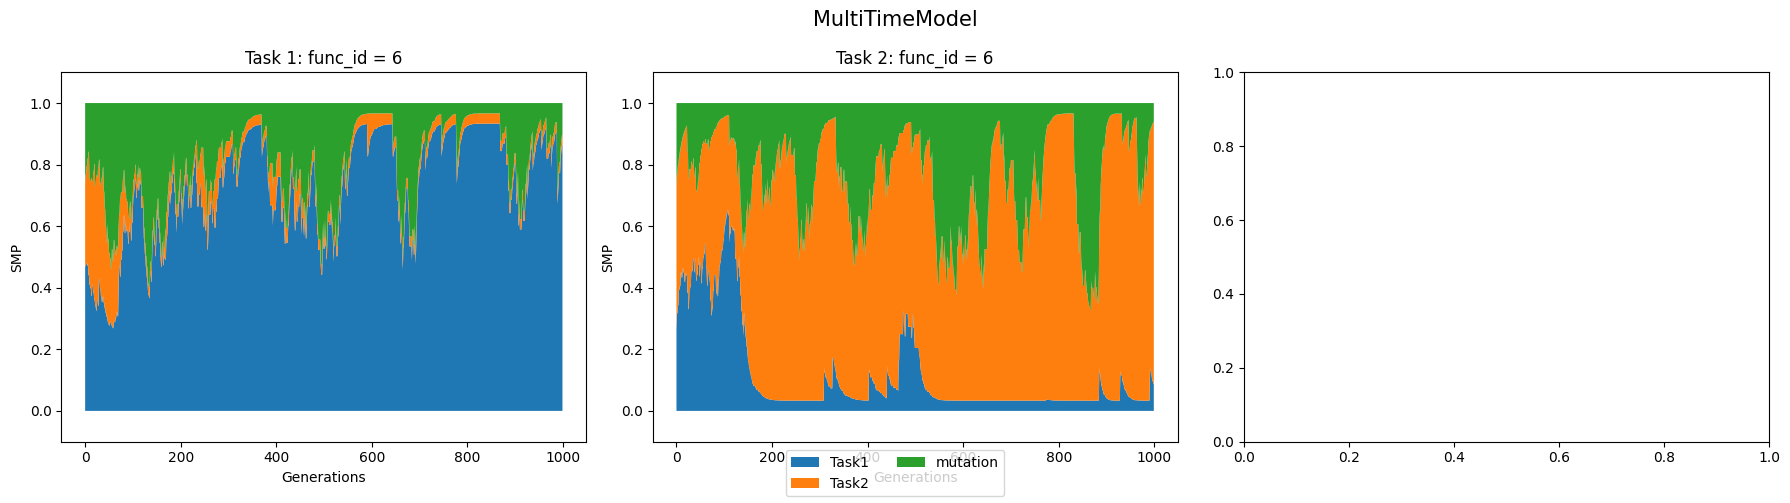

In [23]:
model.render_smp()

In [25]:
compare = CompareResultBenchmark(
    path_folder= "./RESULTS/result/WCCI22_complex",
    ls_benchmark= [WCCI22_benchmark.get_complex_benchmark(i)[0] for i in range(1, 10)]
)

(0 : SMP_v2)
(1 : LSA_COMPLEX)
(2 : LSA_21)
(3 : SMP_COMPLEX_FINAL_CEC10)


In [26]:
compare.summarizing_compare_result()

['SMP_v2', 'LSA_COMPLEX', 'LSA_21', 'SMP_COMPLEX_FINAL_CEC10']


,Better,Equal,Worse
SMP_v2 vs LSA_COMPLEX,17,0,1
SMP_v2 vs LSA_21,6,0,12
SMP_v2 vs SMP_COMPLEX_FINAL_CEC10,16,0,2


In [27]:
compare.show_compare_detail()

Benchmark:  1
                       SMP_v2        LSA_COMPLEX             LSA_21 SMP_COMPLEX_FINAL_CEC10
Tasks1   (+)601.7863413487646  612.7801631385278  608.0086430666668       621.3871000886592
Tasks2   (+)601.3640843001461  621.3176276249004  607.8913740333334        621.362117720952
Compare                   2/2                0/2                0/2                     0/2

Benchmark:  2
                       SMP_v2        LSA_COMPLEX             LSA_21 SMP_COMPLEX_FINAL_CEC10
Tasks1   (+)700.0000000000003  700.0000000010339        700.0025424       700.0010681802964
Tasks2   (+)700.0000000000002  700.0073960406381  700.0032844333333       700.0000000003308
Compare                   2/2                0/2                0/2                     0/2

Benchmark:  3
                    SMP_v2        LSA_COMPLEX                LSA_21 SMP_COMPLEX_FINAL_CEC10
Tasks1   19292.36121446355  148596.7025721677  (+)5287.950267066667       886240.7959509586
Tasks2   66746.16139234831  824972.5